In [1]:
# import dependencies
import pandas as pd
import numpy as np
import requests
import json
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
url = "https://data.cms.gov/data-api/v1/dataset/b736b4bd-3020-4343-b3dc-0010082ccc77/data?"

In [3]:
# To retrieve large json data
all_data = []  # To store all the data

# Set up pagination
page = 0
page_size = 5000  # Adjust the page size 

while True:
    query_url = f"{url}size={page_size}&offset={page}"
    response = requests.get(query_url).json()
    all_data.extend(response)

    if len(all_data) < page:
        # Break the loop if all data has been retrieved
        break

    page += page_size

#print(all_data)

In [4]:
# Convert data into a Pandas DataFrame
mcc_df = pd.DataFrame(all_data)
mcc_df.head()

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_MCC,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
0,State,Alabama,01,65+,All,All,0 to 1,0.2318,1999.566,1806.2546,0.0464,127.2703
1,State,Alabama,01,65+,All,All,2 to 3,0.2911,5198.6566,4738.4133,0.0589,307.573
2,State,Alabama,01,65+,All,All,4 to 5,0.2604,9896.6809,9017.293,0.0936,576.8055
3,State,Alabama,01,65+,All,All,6+,0.2168,27177.0547,24715.7787,0.2071,1594.5694
4,State,Alabama,01,65+,Dual Status,Medicare Only,0 to 1,0.2473,1982.6565,1790.6022,0.0468,117.0981


In [5]:
mcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44976 entries, 0 to 44975
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Bene_Geo_Lvl              44976 non-null  object
 1   Bene_Geo_Desc             44976 non-null  object
 2   Bene_Geo_Cd               44976 non-null  object
 3   Bene_Age_Lvl              44976 non-null  object
 4   Bene_Demo_Lvl             44976 non-null  object
 5   Bene_Demo_Desc            44976 non-null  object
 6   Bene_MCC                  44976 non-null  object
 7   Prvlnc                    44976 non-null  object
 8   Tot_Mdcr_Stdzd_Pymt_PC    44976 non-null  object
 9   Tot_Mdcr_Pymt_PC          44976 non-null  object
 10  Hosp_Readmsn_Rate         44976 non-null  object
 11  ER_Visits_Per_1000_Benes  44976 non-null  object
dtypes: object(12)
memory usage: 4.1+ MB


In [6]:
# Rename all the columns to descriptive columns
mcc_df = mcc_df.rename(columns = {
    "Bene_Geo_Lvl": "Beneficiary_Geographic_Level",
    "Bene_Geo_Desc" : "Beneficiary_Geographic_Description",
    "Bene_Geo_Cd" : "Beneficiary_Geographic_Code",
    "Bene_Age_Lvl" : "Beneficiary_Age_Level",
    "Bene_Demo_Lvl" : "Beneficiary_Demographic_Level",
    "Bene_Demo_Desc" : "Beneficiary_Demographic_Description",
    "Bene_MCC" : "Beneficiary_Multiple_Chronic_Condition_Group",
    "Prvlnc" : "Prevalence",
    "Tot_Mdcr_Stdzd_Pymt_PC" : "Total_Medicare_Standardized_Per_Capita_Spending",
    "Tot_Mdcr_Pymt_PC" : "Total_Medicare_Per_Capita_Spending",
    "Hosp_Readmsn_Rate" : "Hospital_Readmission_Rate",
    "ER_Visits_Per_1000_Benes" : "Emergency_Room_Visits_per_1,000_Beneficiaries",
})
mcc_df.head()

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,65+,All,All,0 to 1,0.2318,1999.566,1806.2546,0.0464,127.2703
1,State,Alabama,01,65+,All,All,2 to 3,0.2911,5198.6566,4738.4133,0.0589,307.573
2,State,Alabama,01,65+,All,All,4 to 5,0.2604,9896.6809,9017.293,0.0936,576.8055
3,State,Alabama,01,65+,All,All,6+,0.2168,27177.0547,24715.7787,0.2071,1594.5694
4,State,Alabama,01,65+,Dual Status,Medicare Only,0 to 1,0.2473,1982.6565,1790.6022,0.0468,117.0981


In [7]:
# check the last rows/size of dataframe
mcc_df.tail()

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
44971,County,Wyoming : Washakie,56043,65+,All,All,6+,0.0983,41050.5844,47269.2138,0.2679,3116.8831
44972,County,Wyoming : Weston,56045,65+,All,All,0 to 1,,,,,
44973,County,Wyoming : Weston,56045,65+,All,All,2 to 3,,,,,
44974,County,Wyoming : Weston,56045,65+,All,All,4 to 5,,,,,
44975,County,Wyoming : Weston,56045,65+,All,All,6+,,,,,


In [8]:
mcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44976 entries, 0 to 44975
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Beneficiary_Geographic_Level                     44976 non-null  object
 1   Beneficiary_Geographic_Description               44976 non-null  object
 2   Beneficiary_Geographic_Code                      44976 non-null  object
 3   Beneficiary_Age_Level                            44976 non-null  object
 4   Beneficiary_Demographic_Level                    44976 non-null  object
 5   Beneficiary_Demographic_Description              44976 non-null  object
 6   Beneficiary_Multiple_Chronic_Condition_Group     44976 non-null  object
 7   Prevalence                                       44976 non-null  object
 8   Total_Medicare_Standardized_Per_Capita_Spending  44976 non-null  object
 9   Total_Medicare_Per_Capita_Spending     

In [9]:
# changing the datatype from object to numeric (float as default)
# x[['D', 'L']] = x[['D', 'L']].apply(pd.to_numeric, errors='coerce')
mcc_df[["Prevalence","Total_Medicare_Standardized_Per_Capita_Spending", \
               "Total_Medicare_Per_Capita_Spending", "Hospital_Readmission_Rate", \
              "Emergency_Room_Visits_per_1,000_Beneficiaries"]] = \
mcc_df[["Prevalence","Total_Medicare_Standardized_Per_Capita_Spending", \
               "Total_Medicare_Per_Capita_Spending", "Hospital_Readmission_Rate", \
              "Emergency_Room_Visits_per_1,000_Beneficiaries"]].apply(pd.to_numeric, errors='coerce')

In [10]:
mcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44976 entries, 0 to 44975
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Beneficiary_Geographic_Level                     44976 non-null  object 
 1   Beneficiary_Geographic_Description               44976 non-null  object 
 2   Beneficiary_Geographic_Code                      44976 non-null  object 
 3   Beneficiary_Age_Level                            44976 non-null  object 
 4   Beneficiary_Demographic_Level                    44976 non-null  object 
 5   Beneficiary_Demographic_Description              44976 non-null  object 
 6   Beneficiary_Multiple_Chronic_Condition_Group     44976 non-null  object 
 7   Prevalence                                       41260 non-null  float64
 8   Total_Medicare_Standardized_Per_Capita_Spending  41232 non-null  float64
 9   Total_Medicare_Per_Capita_Sp

In [11]:
mcc_df.head(1623)

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,65+,All,All,0 to 1,0.2318,1999.5660,1806.2546,0.0464,127.2703
1,State,Alabama,01,65+,All,All,2 to 3,0.2911,5198.6566,4738.4133,0.0589,307.5730
2,State,Alabama,01,65+,All,All,4 to 5,0.2604,9896.6809,9017.2930,0.0936,576.8055
3,State,Alabama,01,65+,All,All,6+,0.2168,27177.0547,24715.7787,0.2071,1594.5694
4,State,Alabama,01,65+,Dual Status,Medicare Only,0 to 1,0.2473,1982.6565,1790.6022,0.0468,117.0981
...,...,...,...,...,...,...,...,...,...,...,...,...
1618,State,Montana,30,All,Sex,Male,4 to 5,0.1543,12460.3594,13218.7885,0.1136,947.8849
1619,State,Montana,30,All,Sex,Male,6+,0.0969,29512.5685,31675.0620,0.1983,2033.8093
1620,National,National,,65+,All,All,0 to 1,0.2990,1864.5824,1890.0697,0.0448,125.2986
1621,National,National,,65+,All,All,2 to 3,0.2957,5266.8693,5451.3164,0.0612,324.0907


In [12]:
mcc_df.head(1681)

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,65+,All,All,0 to 1,0.2318,1999.5660,1806.2546,0.0464,127.2703
1,State,Alabama,01,65+,All,All,2 to 3,0.2911,5198.6566,4738.4133,0.0589,307.5730
2,State,Alabama,01,65+,All,All,4 to 5,0.2604,9896.6809,9017.2930,0.0936,576.8055
3,State,Alabama,01,65+,All,All,6+,0.2168,27177.0547,24715.7787,0.2071,1594.5694
4,State,Alabama,01,65+,Dual Status,Medicare Only,0 to 1,0.2473,1982.6565,1790.6022,0.0468,117.0981
...,...,...,...,...,...,...,...,...,...,...,...,...
1676,National,National,,All,Sex,Male,0 to 1,0.3355,1730.8044,1755.7813,0.0627,172.6146
1677,National,National,,All,Sex,Male,2 to 3,0.2753,5548.3930,5760.2014,0.0817,398.0146
1678,National,National,,All,Sex,Male,4 to 5,0.2175,10817.7796,11432.3795,0.1145,710.6822
1679,National,National,,All,Sex,Male,6+,0.1717,30891.4388,33438.8815,0.2391,1948.2550


## Data can be analyzed at National, State and County level

### Observing the dataset at National level

In [13]:
# Make a dataframe based on National
mcc_national_df = mcc_df.loc[mcc_df["Beneficiary_Geographic_Level"] == "National"]
mcc_national_df = mcc_national_df.reset_index(drop=True)
mcc_national_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,National,National,,65+,All,All,0 to 1,0.2990,1864.5824,1890.0697,0.0448,125.2986
1,National,National,,65+,All,All,2 to 3,0.2957,5266.8693,5451.3164,0.0612,324.0907
2,National,National,,65+,All,All,4 to 5,0.2263,10178.9293,10714.2818,0.0941,633.0037
3,National,National,,65+,All,All,6+,0.1790,28548.8447,30688.9773,0.2134,1747.8357
4,National,National,,65+,Dual Status,Medicare Only,0 to 1,0.3167,1867.0045,1887.5742,0.0434,118.4731
...,...,...,...,...,...,...,...,...,...,...,...,...
115,National,National,,All,Race,non-Hispanic Black,6+,0.2086,35347.0002,38682.4957,0.2745,2624.5654
116,National,National,,All,Race,non-Hispanic White,0 to 1,0.3093,2085.4058,2096.6901,0.0538,168.9387
117,National,National,,All,Race,non-Hispanic White,2 to 3,0.2977,5633.3032,5788.3665,0.0695,387.1976
118,National,National,,All,Race,non-Hispanic White,4 to 5,0.2203,10660.3522,11131.0462,0.1012,716.0436


### Observing the dataset at State level

In [14]:
# summary statistics of national level data
mcc_national_df.describe()

,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.250002,13047.275507,14132.265408,0.133844,1052.779237
std,0.071173,11966.192975,13247.849338,0.078122,943.700769
min,0.110300,1135.560800,1183.622100,0.042600,83.381900
25%,0.189875,3551.087925,3905.361700,0.070525,367.282600
50%,0.248700,8422.653600,9256.054150,0.106500,686.919950
75%,0.296650,18731.692125,21206.373850,0.194650,1643.022400
max,0.437800,41630.397800,48584.000800,0.330000,3853.589800


In [15]:
# Make a dataframe based on State
mcc_state_df = mcc_df.loc[mcc_df["Beneficiary_Geographic_Level"] == "State"]
mcc_state_df = mcc_state_df.reset_index(drop=True)
mcc_state_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,65+,All,All,0 to 1,0.2318,1999.5660,1806.2546,0.0464,127.2703
1,State,Alabama,01,65+,All,All,2 to 3,0.2911,5198.6566,4738.4133,0.0589,307.5730
2,State,Alabama,01,65+,All,All,4 to 5,0.2604,9896.6809,9017.2930,0.0936,576.8055
3,State,Alabama,01,65+,All,All,6+,0.2168,27177.0547,24715.7787,0.2071,1594.5694
4,State,Alabama,01,65+,Dual Status,Medicare Only,0 to 1,0.2473,1982.6565,1790.6022,0.0468,117.0981
...,...,...,...,...,...,...,...,...,...,...,...,...
6475,State,Unknown,,All,Race,non-Hispanic Black,6+,NaN,NaN,NaN,NaN,NaN
6476,State,Unknown,,All,Race,non-Hispanic White,0 to 1,NaN,NaN,NaN,NaN,NaN
6477,State,Unknown,,All,Race,non-Hispanic White,2 to 3,NaN,NaN,NaN,NaN,NaN
6478,State,Unknown,,All,Race,non-Hispanic White,4 to 5,NaN,NaN,NaN,NaN,NaN


In [16]:
#mcc_state_df.to_csv('mcc_state.csv', index = False)

In [17]:
#!pip install fiona

In [18]:
#mcc_state_df.pivot(columns="Beneficiary_Geographic_Description", index="Beneficiary_Age_Level", values="Prevalence")

In [19]:
# summary statistics of State level data
mcc_state_df.describe()

,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
count,6148.000000,6144.000000,6144.000000,5166.000000,5968.000000
mean,0.250000,12975.995065,13859.229936,0.132903,1120.915403
std,0.093055,11916.006121,13165.462137,0.084642,1010.792910
min,0.038700,559.386600,543.921200,0.000000,61.059500
25%,0.181900,3343.145225,3419.407175,0.068625,364.372950
50%,0.244600,8544.315900,8983.925850,0.107800,748.605300
75%,0.299425,20923.524400,23013.689575,0.202075,1701.205100
max,0.624500,100015.061400,119798.096400,0.543200,7459.459500


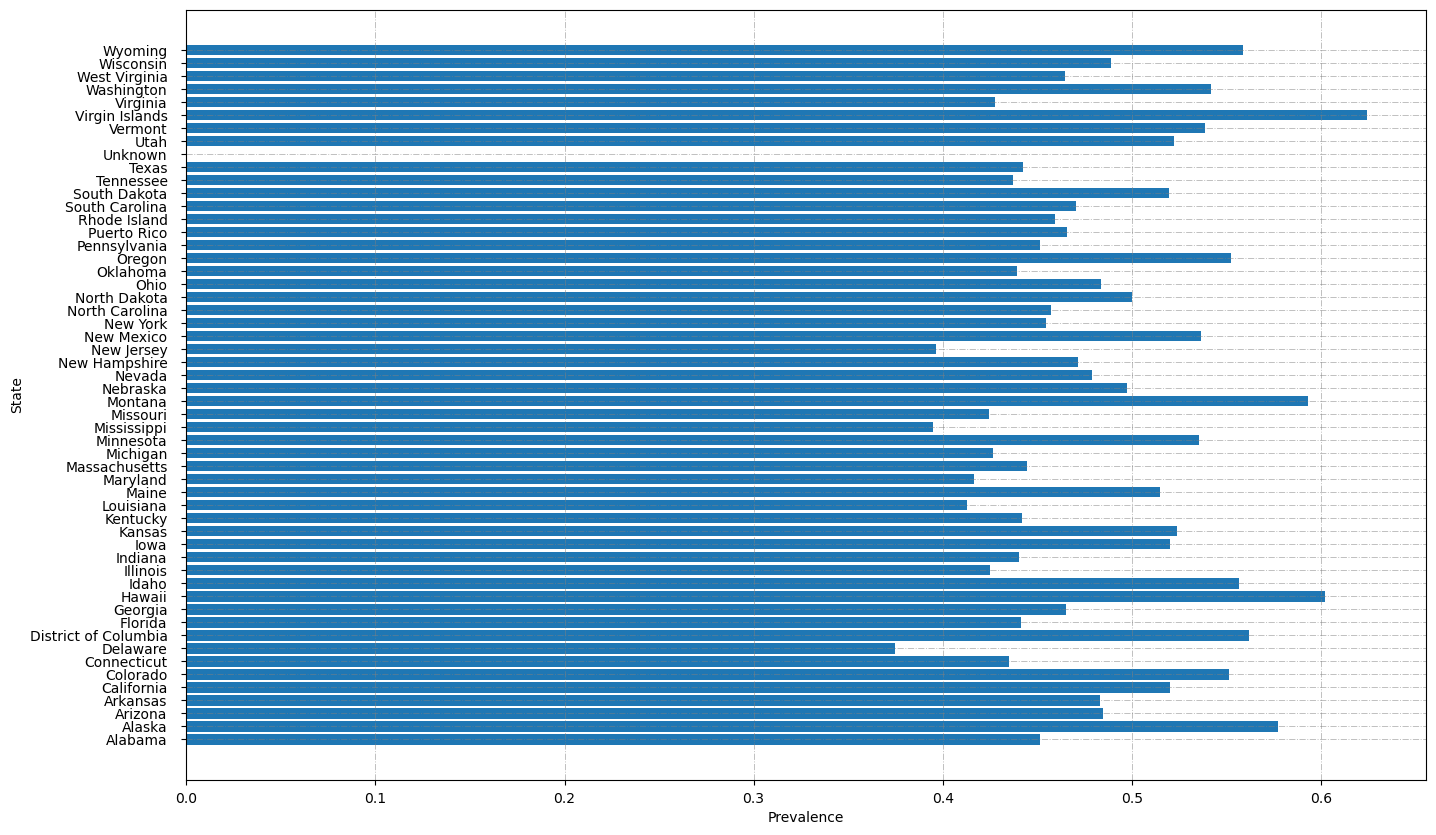

In [20]:
# Observing the prevalence vs state
fig, ax = plt.subplots(figsize =(16, 10))
 
# Horizontal Bar Plot
ax.barh(mcc_state_df["Beneficiary_Geographic_Description"], mcc_state_df["Prevalence"])

# Add axis labels
plt.xlabel("Prevalence")
plt.ylabel("State")

# Add gridlines
ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.7,
        alpha = 0.5)
    
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

plt.show()

### Observing the dataset at county level

In [21]:
# Make a dataframe based on County
mcc_county_df = mcc_df.loc[mcc_df["Beneficiary_Geographic_Level"] == "County"]
mcc_county_df = mcc_county_df.reset_index(drop=True)
mcc_county_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,County,Alabama : Autauga,01001,All,All,All,0 to 1,0.2746,2210.4664,1986.1032,NaN,206.1495
1,County,Alabama : Autauga,01001,All,All,All,2 to 3,0.2795,5779.4177,5124.0744,NaN,411.1187
2,County,Alabama : Autauga,01001,All,All,All,4 to 5,0.2477,9715.1652,8746.9833,0.0751,739.7366
3,County,Alabama : Autauga,01001,All,All,All,6+,0.1982,29804.7963,26863.0748,0.2564,2244.9177
4,County,Alabama : Baldwin,01003,All,All,All,0 to 1,0.2821,2100.8820,1916.7417,NaN,129.1382
...,...,...,...,...,...,...,...,...,...,...,...,...
38371,County,Wyoming : Washakie,56043,65+,All,All,6+,0.0983,41050.5844,47269.2138,0.2679,3116.8831
38372,County,Wyoming : Weston,56045,65+,All,All,0 to 1,NaN,NaN,NaN,NaN,NaN
38373,County,Wyoming : Weston,56045,65+,All,All,2 to 3,NaN,NaN,NaN,NaN,NaN
38374,County,Wyoming : Weston,56045,65+,All,All,4 to 5,NaN,NaN,NaN,NaN,NaN


In [22]:
# creating a County column from the Beneficiary_Geographic_Description column
mcc_county_df["Beneficiary_Geographic_County"] = mcc_county_df["Beneficiary_Geographic_Description"].str.split(": ").str[1]
mcc_county_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries",Beneficiary_Geographic_County
0,County,Alabama : Autauga,01001,All,All,All,0 to 1,0.2746,2210.4664,1986.1032,NaN,206.1495,Autauga
1,County,Alabama : Autauga,01001,All,All,All,2 to 3,0.2795,5779.4177,5124.0744,NaN,411.1187,Autauga
2,County,Alabama : Autauga,01001,All,All,All,4 to 5,0.2477,9715.1652,8746.9833,0.0751,739.7366,Autauga
3,County,Alabama : Autauga,01001,All,All,All,6+,0.1982,29804.7963,26863.0748,0.2564,2244.9177,Autauga
4,County,Alabama : Baldwin,01003,All,All,All,0 to 1,0.2821,2100.8820,1916.7417,NaN,129.1382,Baldwin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38371,County,Wyoming : Washakie,56043,65+,All,All,6+,0.0983,41050.5844,47269.2138,0.2679,3116.8831,Washakie
38372,County,Wyoming : Weston,56045,65+,All,All,0 to 1,NaN,NaN,NaN,NaN,NaN,Weston
38373,County,Wyoming : Weston,56045,65+,All,All,2 to 3,NaN,NaN,NaN,NaN,NaN,Weston
38374,County,Wyoming : Weston,56045,65+,All,All,4 to 5,NaN,NaN,NaN,NaN,NaN,Weston


In [23]:
# converting the datatype of Beneficiary_Geographic_Code
mcc_county_df["Beneficiary_Geographic_Code"] = mcc_county_df["Beneficiary_Geographic_Code"].apply(pd.to_numeric, errors='coerce')
mcc_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38376 entries, 0 to 38375
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Beneficiary_Geographic_Level                     38376 non-null  object 
 1   Beneficiary_Geographic_Description               38376 non-null  object 
 2   Beneficiary_Geographic_Code                      38376 non-null  int64  
 3   Beneficiary_Age_Level                            38376 non-null  object 
 4   Beneficiary_Demographic_Level                    38376 non-null  object 
 5   Beneficiary_Demographic_Description              38376 non-null  object 
 6   Beneficiary_Multiple_Chronic_Condition_Group     38376 non-null  object 
 7   Prevalence                                       34992 non-null  float64
 8   Total_Medicare_Standardized_Per_Capita_Spending  34968 non-null  float64
 9   Total_Medicare_Per_Capita_Sp

In [24]:
# creating a State code from Beneficiary_Geographic_Code to merge with geojson data later
# Using floor division to extract the State code
mcc_county_df.loc[:,"State_Code"] = mcc_county_df["Beneficiary_Geographic_Code"] // 1000
mcc_county_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries",Beneficiary_Geographic_County,State_Code
0,County,Alabama : Autauga,1001,All,All,All,0 to 1,0.2746,2210.4664,1986.1032,NaN,206.1495,Autauga,1
1,County,Alabama : Autauga,1001,All,All,All,2 to 3,0.2795,5779.4177,5124.0744,NaN,411.1187,Autauga,1
2,County,Alabama : Autauga,1001,All,All,All,4 to 5,0.2477,9715.1652,8746.9833,0.0751,739.7366,Autauga,1
3,County,Alabama : Autauga,1001,All,All,All,6+,0.1982,29804.7963,26863.0748,0.2564,2244.9177,Autauga,1
4,County,Alabama : Baldwin,1003,All,All,All,0 to 1,0.2821,2100.8820,1916.7417,NaN,129.1382,Baldwin,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38371,County,Wyoming : Washakie,56043,65+,All,All,6+,0.0983,41050.5844,47269.2138,0.2679,3116.8831,Washakie,56
38372,County,Wyoming : Weston,56045,65+,All,All,0 to 1,NaN,NaN,NaN,NaN,NaN,Weston,56
38373,County,Wyoming : Weston,56045,65+,All,All,2 to 3,NaN,NaN,NaN,NaN,NaN,Weston,56
38374,County,Wyoming : Weston,56045,65+,All,All,4 to 5,NaN,NaN,NaN,NaN,NaN,Weston,56


In [25]:
# Rearranging the columns of mcc_county_df
mcc_county_df = mcc_county_df[["Beneficiary_Geographic_Level", "Beneficiary_Geographic_Description", \
                               "State_Code", "Beneficiary_Geographic_County", "Beneficiary_Geographic_Code", \
                               "Beneficiary_Age_Level", "Beneficiary_Demographic_Level", \
                               "Beneficiary_Demographic_Description", "Beneficiary_Multiple_Chronic_Condition_Group", 
                               "Prevalence", "Total_Medicare_Standardized_Per_Capita_Spending", \
                               "Total_Medicare_Per_Capita_Spending", "Hospital_Readmission_Rate", \
                               "Emergency_Room_Visits_per_1,000_Beneficiaries"]]
mcc_county_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,State_Code,Beneficiary_Geographic_County,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,County,Alabama : Autauga,1,Autauga,1001,All,All,All,0 to 1,0.2746,2210.4664,1986.1032,NaN,206.1495
1,County,Alabama : Autauga,1,Autauga,1001,All,All,All,2 to 3,0.2795,5779.4177,5124.0744,NaN,411.1187
2,County,Alabama : Autauga,1,Autauga,1001,All,All,All,4 to 5,0.2477,9715.1652,8746.9833,0.0751,739.7366
3,County,Alabama : Autauga,1,Autauga,1001,All,All,All,6+,0.1982,29804.7963,26863.0748,0.2564,2244.9177
4,County,Alabama : Baldwin,1,Baldwin,1003,All,All,All,0 to 1,0.2821,2100.8820,1916.7417,NaN,129.1382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38371,County,Wyoming : Washakie,56,Washakie,56043,65+,All,All,6+,0.0983,41050.5844,47269.2138,0.2679,3116.8831
38372,County,Wyoming : Weston,56,Weston,56045,65+,All,All,0 to 1,NaN,NaN,NaN,NaN,NaN
38373,County,Wyoming : Weston,56,Weston,56045,65+,All,All,2 to 3,NaN,NaN,NaN,NaN,NaN
38374,County,Wyoming : Weston,56,Weston,56045,65+,All,All,4 to 5,NaN,NaN,NaN,NaN,NaN


In [26]:
# converting State_Code and Beneficiary_Geographic_Code back to str object dtype
mcc_county_df["State_Code"] = mcc_county_df["State_Code"].apply(str)
mcc_county_df["Beneficiary_Geographic_Code"] = mcc_county_df["Beneficiary_Geographic_Code"].apply(str)
mcc_county_df.to_csv('mcc_county_df.csv', index = False)
mcc_county_df.describe()

,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
count,34992.000000,34968.000000,34968.000000,19968.000000,33280.000000
mean,0.249314,12534.377586,12789.767056,0.124930,1043.465019
std,0.086145,11425.781345,11992.028707,0.096249,941.349770
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.187900,3701.629300,3610.721300,0.048000,351.340350
50%,0.247600,8623.887000,8543.311100,0.111050,704.105150
75%,0.298200,20828.810275,21330.442525,0.207500,1637.625525
max,0.614200,99351.462500,102920.896500,0.485100,7777.777800


In [34]:
mcc_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38376 entries, 0 to 38375
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Beneficiary_Geographic_Level                     38376 non-null  object 
 1   Beneficiary_Geographic_Description               38376 non-null  object 
 2   State_Code                                       38376 non-null  object 
 3   Beneficiary_Geographic_County                    38376 non-null  object 
 4   Beneficiary_Geographic_Code                      38376 non-null  object 
 5   Beneficiary_Age_Level                            38376 non-null  object 
 6   Beneficiary_Demographic_Level                    38376 non-null  object 
 7   Beneficiary_Demographic_Description              38376 non-null  object 
 8   Beneficiary_Multiple_Chronic_Condition_Group     38376 non-null  object 
 9   Prevalence                  

In [27]:
# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
geoData.head(10)

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,01001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,01009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,01017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,01021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,01033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
5,01045,0500000US01045,01,045,Dale,County,561.150,"POLYGON ((-85.41644 31.61947, -85.41743 31.314..."
6,01051,0500000US01051,01,051,Elmore,County,618.485,"POLYGON ((-86.33678 32.76747, -86.31948 32.753..."
7,01065,0500000US01065,01,065,Hale,County,643.943,"POLYGON ((-87.42120 32.87451, -87.47217 32.830..."
8,01079,0500000US01079,01,079,Lawrence,County,690.678,"POLYGON ((-87.10507 34.68604, -87.10591 34.587..."
9,01083,0500000US01083,01,083,Limestone,County,559.936,"POLYGON ((-86.83631 34.99176, -86.82066 34.991..."


In [28]:
geoData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          3221 non-null   object  
 1   GEO_ID      3221 non-null   object  
 2   STATE       3221 non-null   object  
 3   COUNTY      3221 non-null   object  
 4   NAME        3221 non-null   object  
 5   LSAD        3221 non-null   object  
 6   CENSUSAREA  3221 non-null   float64 
 7   geometry    3221 non-null   geometry
dtypes: float64(1), geometry(1), object(6)
memory usage: 201.4+ KB


In [29]:
# add the json to into mcc_county dataset
# merged_df = geoData.merge(mcc_county_df, left_on=["NAME"], right_on=["Beneficiary_Geographic_County"])
merged_df = mcc_county_df.merge(geoData, left_on=["State_Code", "Beneficiary_Geographic_County"], right_on=["STATE","COUNTY"])

# we need to deal with pesky multipolygons
merged_df = merged_df.explode("geometry")
merged_df


,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,State_Code,Beneficiary_Geographic_County,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,...,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries",id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry


In [35]:
# trying the merge just on county
merged_df = mcc_county_df.merge(geoData, left_on=["Beneficiary_Geographic_County"], right_on=["COUNTY"])
merged_df

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,State_Code,Beneficiary_Geographic_County,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,...,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries",id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry


In [30]:
merged_gdf = gpd.GeoDataFrame(merged_df)

# Check for valid geometries
print(merged_gdf.geometry.is_valid)

Series([], dtype: bool)


In [31]:
merged_gdf.to_csv('mcc_state_merged_geometry.csv', index = False)

In [32]:
geoData = geoData.loc[geoData["STATE"] == "06", :]

KeyError: 'In labor force'

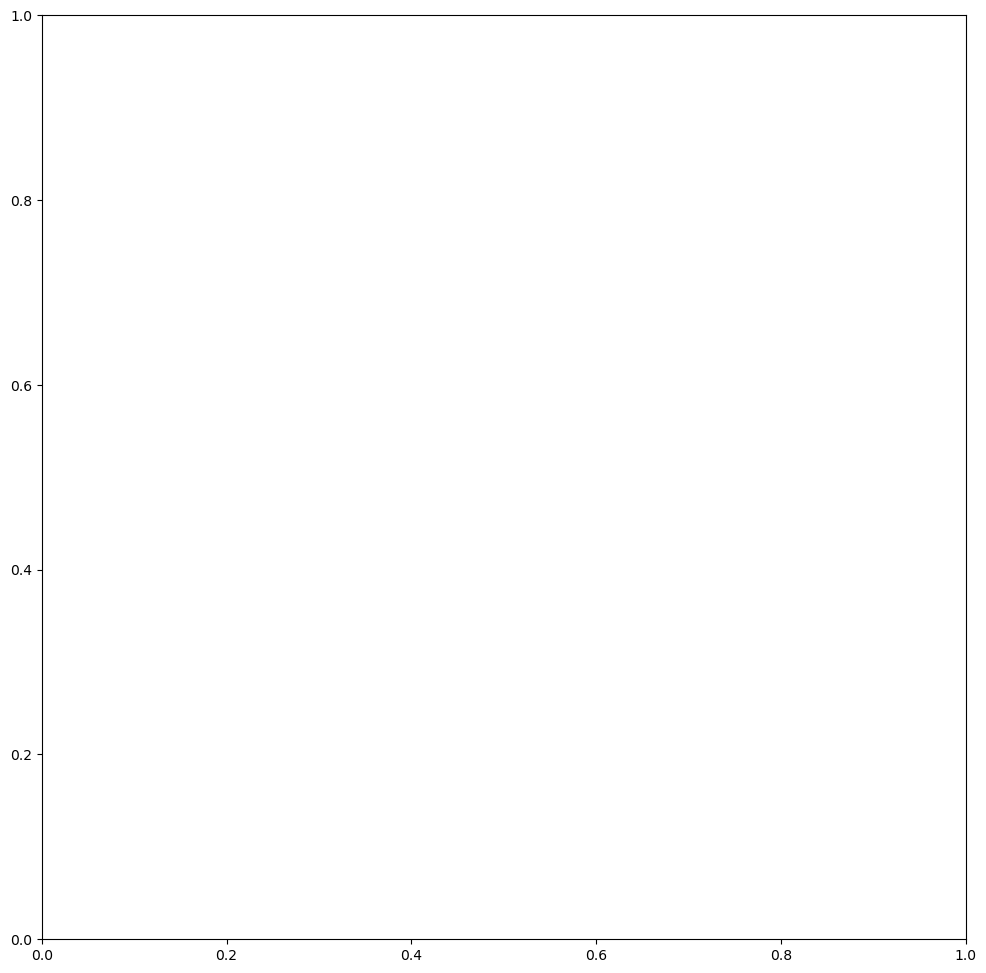

In [33]:
import matplotlib.pyplot as plt
import mapclassify as mc

fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Map
gplt.choropleth(merged_df, 
    hue="In labor force", 
    linewidth=.1,
    cmap = 'inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

## References
https://www.statology.org/pandas-convert-object-to-float/
    